# Introduction

Instrumentation ticket: [T294738](https://phabricator.wikimedia.org/T294738)  
QA ticket:   

Web team has deployed the instrumentation to measure bounce rate of anonymous user on mobile web talk page on 2021-11-16. 
The related events will be stored in `event.mobilewebuiactionstracking` schema. Sample rate is 1% on English Wikipedia, and 10% everywhere else. 

# Instrumentation note

- init events   
query condition:  event.action='init' and event.isanon=true   

  
- events of clicking on article or talk page tab   
query condition: event.action='click'  and event.isanon=true and event.name='tabs.subject' for article tab or event.name='tabs.talk' for talk tab  
    
    
- events of clicking "Add new discussion"   
query condition: event.action='click'  and event.isanon=true and event.name='talkpage.add-topic'  
    
    
- events of clicking a section heading  
query condition: event.action='click'  and event.isanon=true and event.name='talkpage.section'  

  
- events of clicking read as wiki page  
query condition: event.action='click'  and event.isanon=true and event.name='talkpage.readAsWiki'
  

# Table of Contents

1. [Check init event](#Check-init-events)
2. [Check events of clicking on article or talk page tab](#Check-events-of-clicking-on-article-talk-page-tab)
3. [Check events of clicking "Add new discussion"](#Check-events-of-clicking-"Add-new-discussion")
4. [Check events of clicking a section heading](#Check-events-of-clicking-a-section-heading)
5. [Check events of clicking read as wiki page](#Check-events-of-clicking-read-as-wiki-page)
6. [Check whether we can join init event and click event by token](#Check-whether-we-can-join-init-event-and-click-event-by-token)

In [2]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
library(tidyverse); 
library(lubridate); 
library(scales);
library(magrittr); 
library(dplyr);
})

In [3]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [16]:
options(repr.plot.width = 15, repr.plot.height = 10)

__QA on 11/16/2021__

# Check init events

## Check whether the init event is avaiable in schema

In [5]:
query <- 
"
select wiki, min(dt)
FROM event.mobilewebuiactionstracking
WHERE year=2021 
and event.action='init'
GROUP BY wiki
"

In [6]:
df <-  wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [7]:
df

wiki,X_c1
<chr>,<chr>
akwiki,2021-11-16T04:18:55.551Z
arcwiki,2021-11-16T01:48:34.863Z
arywiki,2021-11-16T00:37:44.463Z
avkwiki,2021-11-16T05:01:17.642Z
bxrwiki,2021-11-16T07:43:16.549Z
cowiki,2021-11-16T01:25:14.056Z
dewikivoyage,2021-11-16T00:32:06.992Z
enwikivoyage,2021-11-16T00:29:43.720Z
eswiki,2021-11-16T00:24:26.400Z


**Note**:   

The init event is available in mobilewebuiactionstracking as early as 2021-11-16 UTC across all wikis and wiki families. 

## Init events by namespace on enwiki

In [12]:
query <- 
"
select event.name, count(1) AS events
FROM event.mobilewebuiactionstracking
WHERE year=2021 
AND  event.action='init'
AND wiki='enwiki'
GROUP BY event.name
ORDER BY events DESC
LIMIT 10000
"

In [13]:
df <-  wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [14]:
df

name,events
<chr>,<int>
ns=0,975991
ns=-1,6463
ns=14,3356
ns=6,1653
ns=1,1306
ns=4,950
ns=2,348
ns=12,333
ns=100,286


**Note**: 

AS of 2021/11/16 (11:56 PM UTC) , on English Wikipedia, the number of events on content page ( namespace=0)  is 975991. 


The number of events on talk pages:

| namespace | events |
| :- | -: |
| 1 | 1306 |
|3| 70|
|5| 18|
|7| 10|
|9| 0|
|11| 5|
|13| 2| 
|15| 4|

## Events by anonymous users on enwiki talk page

In [15]:
query <- 
"
select event.name, event.isanon, count(1) AS events
FROM event.mobilewebuiactionstracking
WHERE year=2021 
AND  event.action='init'
AND wiki='enwiki' AND event.name IN ('ns=1','ns=3','ns=5','ns=7','ns=9','ns=11', 'ns=13','ns=15')
GROUP BY event.name, event.isanon
ORDER BY event.name, event.isanon
LIMIT 10000
"

In [16]:
df <-  wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [17]:
df

name,isanon,events
<chr>,<chr>,<int>
ns=1,false,27
ns=1,true,1279
ns=11,true,5
ns=13,true,2
ns=15,true,4
ns=3,false,29
ns=3,true,41
ns=5,false,4
ns=5,true,14


In [18]:
query <- 
"
select event.name, event.isanon, count(1) AS events
FROM event.mobilewebuiactionstracking
WHERE year=2021 
AND  event.action='init'
AND wiki='enwiki' 
GROUP BY event.name, event.isanon
ORDER BY event.name, event.isanon
LIMIT 10000
"

In [19]:
df <-  wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [20]:
df

name,isanon,events
<chr>,<chr>,<int>
ns=-1,false,431
ns=-1,true,6032
ns=0,false,4576
ns=0,true,971415
ns=1,false,27
ns=1,true,1279
ns=10,false,7
ns=10,true,196
ns=100,false,8


__QA on 12/06/2021__

## Check the daily init events since the instrumentation

In [5]:

query_daily <- 
"
select date(substr(regexp_replace(dt, 'T|Z',' '),1 , 19)) AS date_time,   event.isanon, count(1) AS init_events
FROM event.mobilewebuiactionstracking
WHERE year=2021 
AND  event.action='init'
AND wiki='enwiki' 
GROUP BY date(substr(regexp_replace(dt, 'T|Z',' '),1 , 19)),  event.isanon
ORDER BY date_time,  event.isanon
LIMIT 10000
"

In [6]:
df_daily <-  wmfdata::query_hive(query_daily)

Don't forget to authenticate with Kerberos using kinit



In [13]:
df_daily$date_time <- as.Date(df_daily$date_time)

In [14]:
df_daily 

date_time,isanon,init_events
<date>,<chr>,<int>
2021-11-16,false,6108
2021-11-16,true,1151072
2021-11-17,false,6219
2021-11-17,true,1183287
2021-11-18,false,6068
2021-11-18,true,1192861
2021-11-19,false,6055
2021-11-19,true,1192030
2021-11-20,false,6785


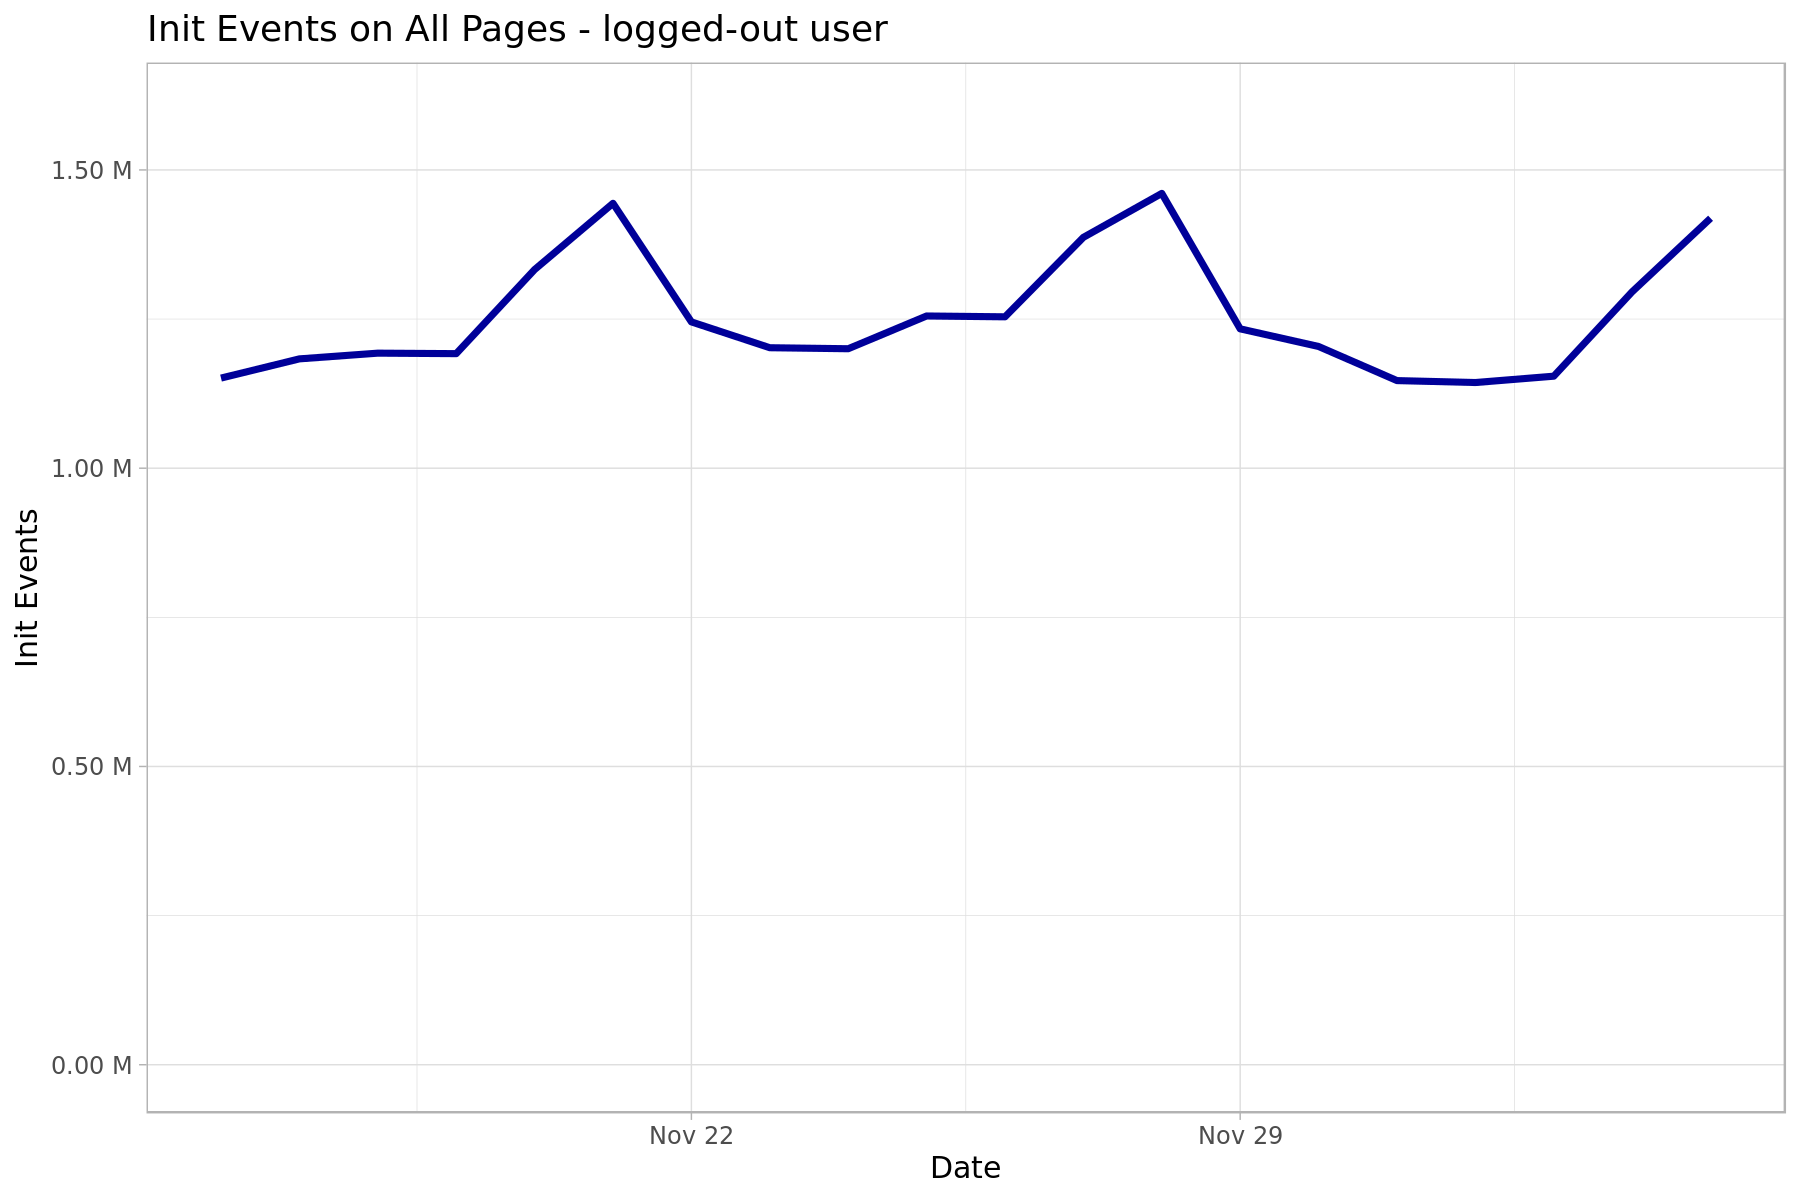

In [31]:
daily_init_graph <- ggplot(data=filter(df_daily, (isanon=='true')& (date_time<'2021-12-06')) , 
                                mapping=aes(x=date_time, y=init_events)) +
geom_line(size = 2, color='#000099') +
scale_y_continuous(limit = c(0, 1600000), labels = label_number(suffix = " M", scale = 1e-6))  +
labs(title = 'Init Events on All Pages - logged-out user',
     x = 'Date',
     y = 'Init Events') + 
theme_light(base_size = 18) ;

daily_init_graph

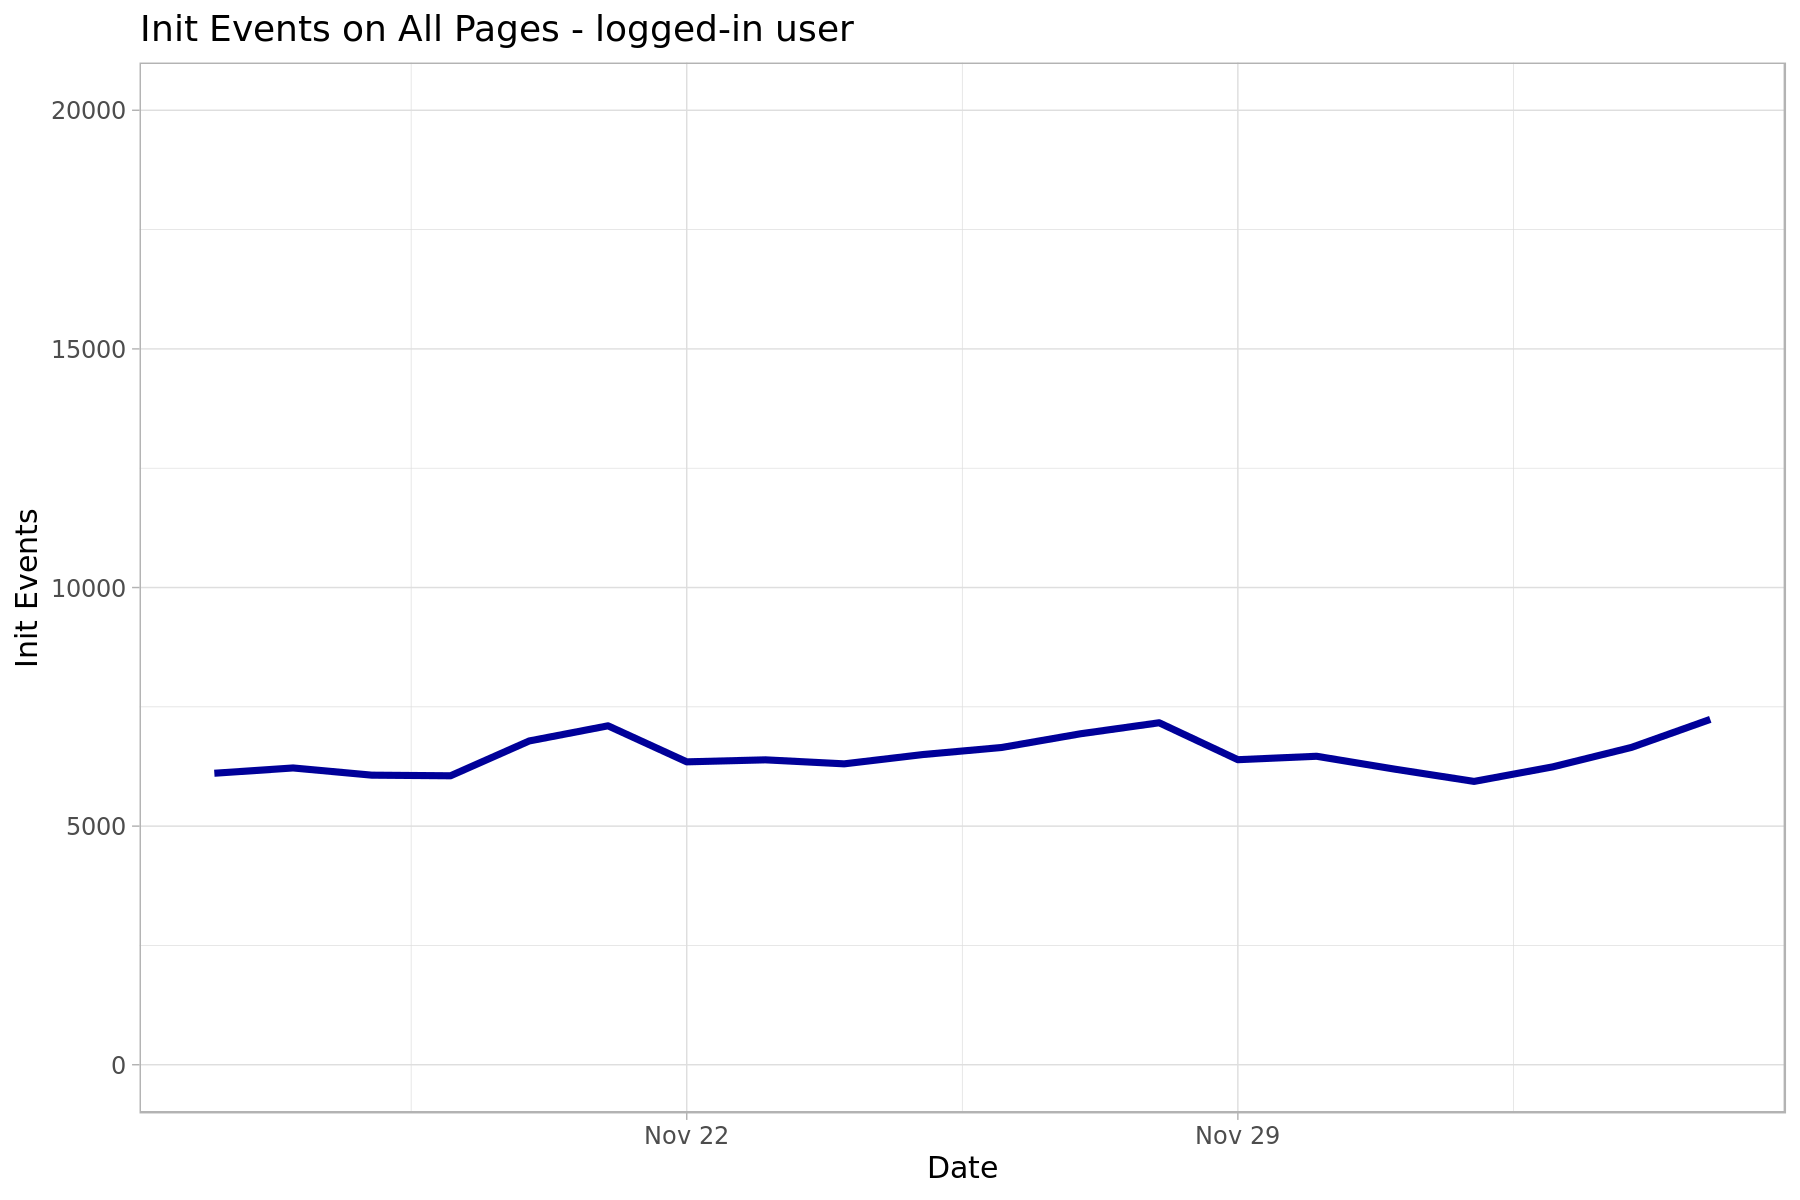

In [32]:
daily_init_graph <- ggplot(data=filter(df_daily, (isanon=='false')& (date_time<'2021-12-06')) , 
                                mapping=aes(x=date_time, y=init_events)) +
geom_line(size = 2, color='#000099') +
scale_y_continuous(limit = c(0, 20000))  +
labs(title = 'Init Events on All Pages - logged-in user',
     x = 'Date',
     y = 'Init Events') + 
theme_light(base_size = 18) ;

daily_init_graph

## Check the daily  init events on talk pages since the instrumentation

In [33]:

query_talk_daily <- 
"
select date(substr(regexp_replace(dt, 'T|Z',' '),1 , 19)) AS date_time,   event.isanon, count(1) AS init_events
FROM event.mobilewebuiactionstracking
WHERE year=2021 
AND  event.action='init'
AND wiki='enwiki' 
AND event.name IN ('ns=1','ns=3','ns=5','ns=7','ns=9','ns=11', 'ns=13','ns=15')
GROUP BY date(substr(regexp_replace(dt, 'T|Z',' '),1 , 19)),  event.isanon
ORDER BY date_time,  event.isanon
LIMIT 10000
"

In [34]:
df_talk_daily <-  wmfdata::query_hive(query_talk_daily)

Don't forget to authenticate with Kerberos using kinit



In [35]:
df_talk_daily$date_time <- as.Date(df_talk_daily$date_time)

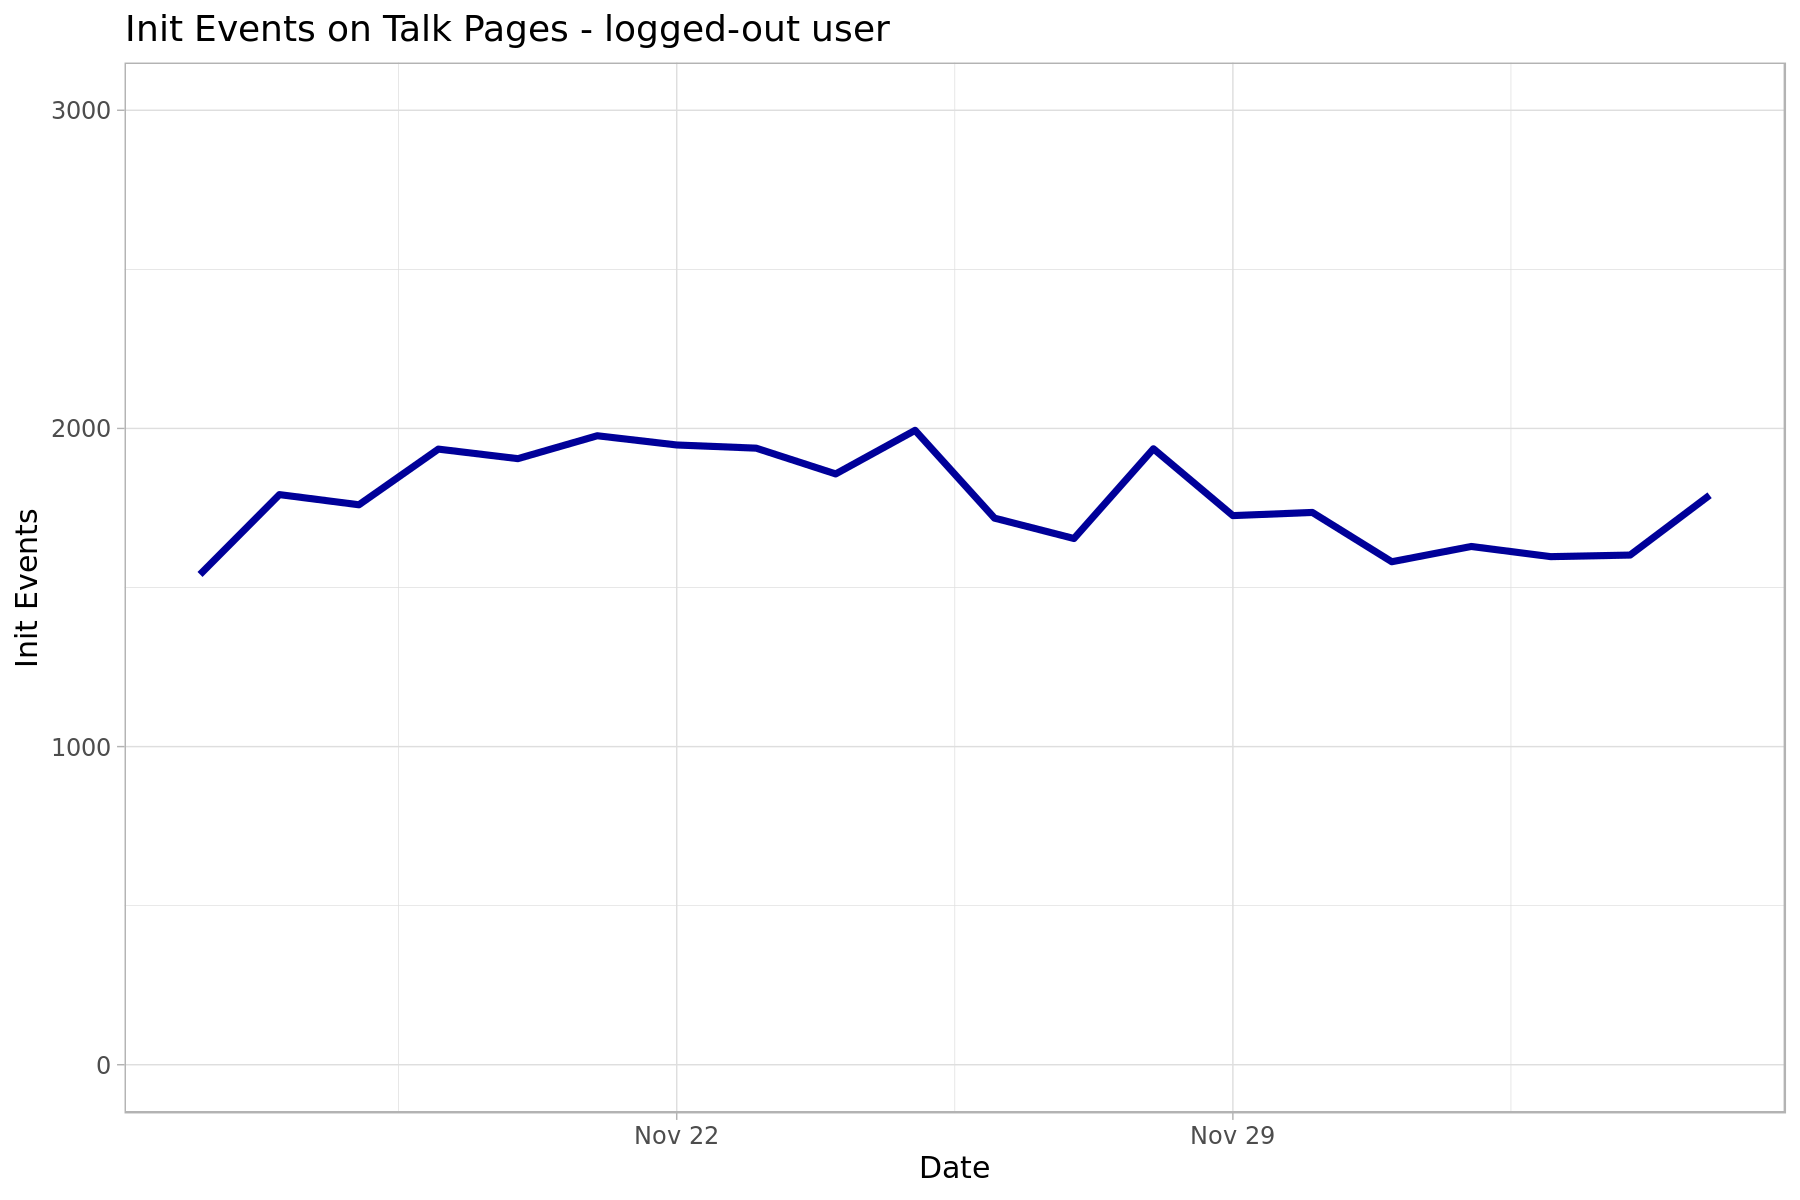

In [39]:
daily_talk_init_graph <- ggplot(data=filter(df_talk_daily, (isanon=='true')& (date_time<'2021-12-06')) , 
                                mapping=aes(x=date_time, y=init_events)) +
geom_line(size = 2, color='#000099') +
scale_y_continuous(limit = c(0, 3000))  +
labs(title = 'Init Events on Talk Pages - logged-out user',
     x = 'Date',
     y = 'Init Events') + 
theme_light(base_size = 18) ;

daily_talk_init_graph

In [44]:
filter(df_talk_daily, (isanon=='true')&(date_time<'2021-12-06'))

date_time,isanon,init_events
<date>,<chr>,<int>
2021-11-16,true,1541
2021-11-17,true,1792
2021-11-18,true,1760
2021-11-19,true,1935
2021-11-20,true,1905
2021-11-21,true,1977
2021-11-22,true,1948
2021-11-23,true,1938
2021-11-24,true,1857


In [47]:
mean((filter(df_talk_daily, (isanon=='true')&(date_time<'2021-12-06')&(date_time > '2021-11-16')))$init_events)

[1] 1793.421

__Note__  

The daily init events from talk pages by anonymous user is 1793.[1]

[1] The average from 2021-11-17 to 2021-12-05.

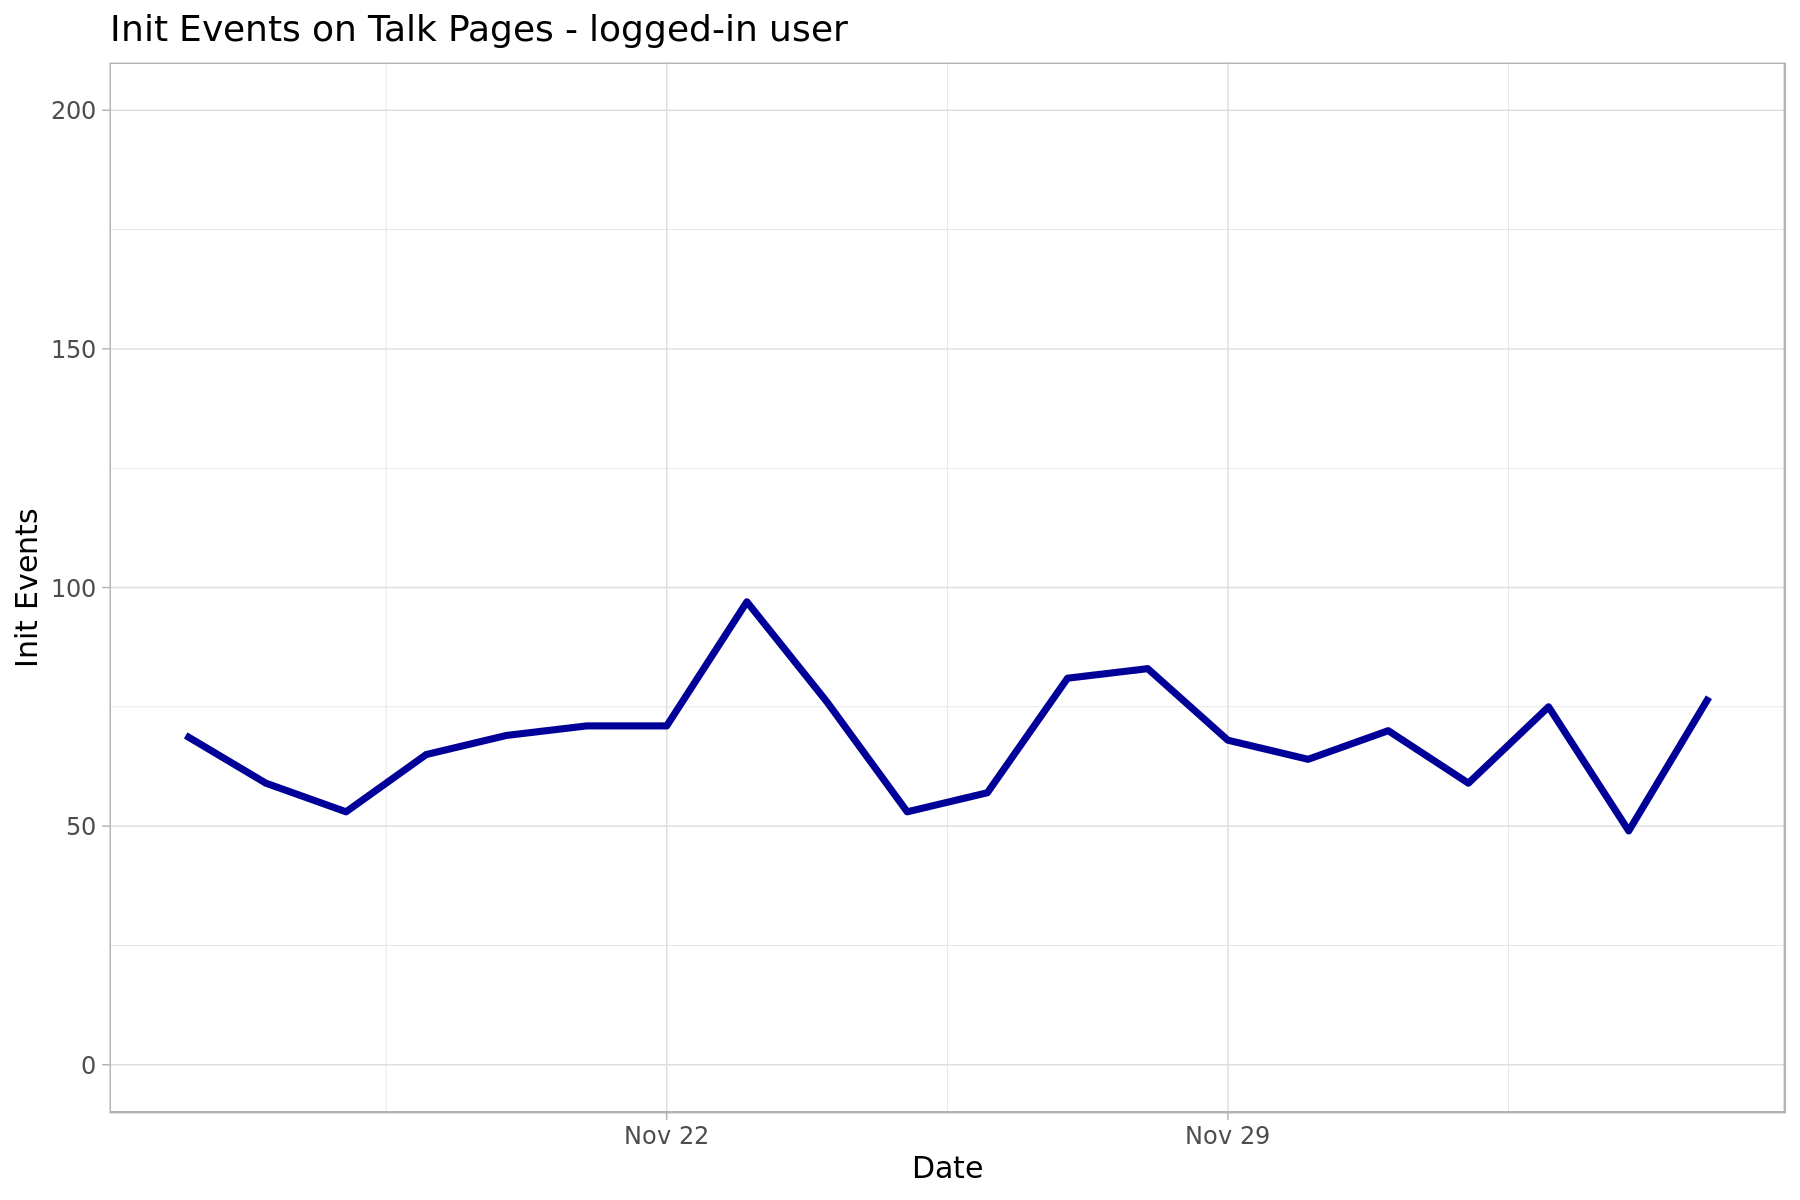

In [42]:
daily_talk_init_graph <- ggplot(data=filter(df_talk_daily, (isanon=='false')& (date_time<'2021-12-06')) , 
                                mapping=aes(x=date_time, y=init_events)) +
geom_line(size = 2, color='#000099') +
scale_y_continuous(limit = c(0, 200))  +
labs(title = 'Init Events on Talk Pages - logged-in user',
     x = 'Date',
     y = 'Init Events') + 
theme_light(base_size = 18) ;

daily_talk_init_graph

# Check events of clicking on article talk page tab


__QA on 12/09/2021__

In [86]:
query_talkepage_click <- 
"SELECT distinct event.name 
FROM event.mobilewebuiactionstracking
WHERE year=2021 and month in (12) 
AND  event.action='click' and event.name LIKE '%talkpage%'
AND event.isanon=true
AND wiki='enwiki' 
"

In [87]:
df_talkepage_click  <-  wmfdata::query_hive(query_talkepage_click)

Don't forget to authenticate with Kerberos using kinit



In [88]:
df_talkepage_click 

name
<chr>
talkpage.add-topic
talkpage.section
talkpage.readAsWiki


__Note__:  

Confirmed that following events are available in schema.  

Clicks to add discussion are tracked with name = `talkpage.add-topic` AND action = 'click'  
Clicks to read as wiki page are tracked with name = `talkpage.readAsWiki`AND action = 'click'  
Clicks to sections are tracked with name =`talkpage.section` AND action=  'click'  


In [59]:
query_talkepage_click <- 
"SELECT distinct event.name 
FROM event.mobilewebuiactionstracking
WHERE year=2021 and month in (12) 
AND  event.action='click'
AND wiki='enwiki' and  event.isanon=true
"

In [60]:
df_talkepage_click  <-  wmfdata::query_hive(query_talkepage_click)

Don't forget to authenticate with Kerberos using kinit



In [61]:
df_talkepage_click

name
<chr>
menu.contributions
menu.history
menu.info
menu.random
menu.languages
menu.donate
menu.watch
tabs.subject
menu.settings


__Note__:   
  
Tested both anonymous uesr and logged-in user.
Old instrumentation events like menu.watch, menu.history, menu.edit are captured as expected.


Click on article tab is captured with event.name='tabs.subject'    
Click on talk tab is captured with event.name='tabs.talk'  

# Check events of clicking "Add new discussion"


__QA on 12/14/2021__

In [89]:
query <- 
"SELECT *
FROM event.mobilewebuiactionstracking
WHERE year=2021 
AND  event.action='click' and event.name = 'talkpage.add-topic'
AND wiki='enwiki' AND event.isanon=true
ORDER BY dt
LIMIT 100
"

In [90]:
df <-  wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



__Note:__  

Events are available since 2021-11-08

# Check events of clicking a section heading 


In [92]:
query <- 
"SELECT *
FROM event.mobilewebuiactionstracking
WHERE year=2021 
AND  event.action='click' and event.name = 'talkpage.section'
AND wiki='enwiki' AND event.isanon=true
ORDER BY dt
LIMIT 100
"

In [93]:
df <-  wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



__Note:__  

Events are available since 2021-11-08

# Check events of clicking read as wiki page

In [97]:
query <- 
"SELECT *
FROM event.mobilewebuiactionstracking
WHERE year=2021 
AND  event.action='click' and event.name = 'talkpage.readAsWiki'
AND wiki='enwiki' AND event.isanon=true
ORDER BY dt
LIMIT 100
"

In [98]:
df <-  wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



__Note:__  

Events are available since 2021-11-08

# Check whether we can join init event and click event by token

In [112]:
query_init_click <- 
"
WITH t1 AS (
SELECT   MIN(TO_DATE(dt)) AS init_date,
event.token AS session_id
FROM event.mobilewebuiactionstracking AS t_i
WHERE  t_i.year=2021
AND t_i.event.action='init' AND t_i.event.name='ns=1'
AND t_i.wiki='enwiki' and t_i.event.isanon=true
GROUP BY event.token
),
t2 AS (SELECT TO_DATE(dt) AS click_date, 
event.token AS session_id
FROM event.mobilewebuiactionstracking AS t_c
WHERE t_c.year=2021 
AND  t_c.event.action='click' 
AND t_c.wiki='enwiki' and t_c.event.isanon=true
)
SELECT  init_date, COUNT(DISTINCT t1.session_id) AS initiated_sessions, 
COUNT(DISTINCT t2.session_id) AS clicked_sessions
FROM t1 LEFT JOIN t2 
ON t1.session_id=t2.session_id
GROUP BY init_date
"

In [113]:
df_init_click <- wmfdata::query_hive(query_init_click)

Don't forget to authenticate with Kerberos using kinit



In [114]:
df_init_click

init_date,initiated_sessions,clicked_sessions
<chr>,<int>,<int>
2021-11-16,1447,624
2021-11-17,1708,734
2021-11-18,1659,701
2021-11-19,1829,794
2021-11-20,1799,718
2021-11-21,1880,725
2021-11-22,1830,760
2021-11-23,1847,742
2021-11-24,1734,668


# QA Summary
PASSED CHECKS:  
✅  Check init event  
✅  Check events of clicking on article or talk page tab  
✅  Check events of clicking "Add new discussion"  
✅  Check events of clicking a section heading  
✅  Check events of clicking read as wiki page 
✅  Check being able to join init event with click event by event.token.